In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("data.csv")
df.head()

,Team,Location,Division,Tier,Image Score,Cyber-Physical Challenge,Net Academy Challenge,Web Based Challenge,Total
0,17-0008,AL,Open,Platinum,119,40.00,112.74,15,286.74
1,17-0010,AL,Open,Gold,58,21.33,37.97,0,117.30
2,17-0014,OK,Open,Platinum,57,16.00,60.35,0,133.35
3,17-0015,IN,Middle School,Middle School,65,0.00,0.00,0,65.00
4,17-0019,NJ,CAP,Platinum,115,80.00,41.29,76,312.29


In [11]:
tiers = df["Tier"]


In [12]:
numericaldata = df.drop("Location",axis = 1)
numericaldata = numericaldata.drop("Division",axis = 1)
numericaldata = numericaldata.drop("Tier", axis = 1)


In [13]:
numericaldata = numericaldata.drop("Team",axis = 1)


<Axes: >

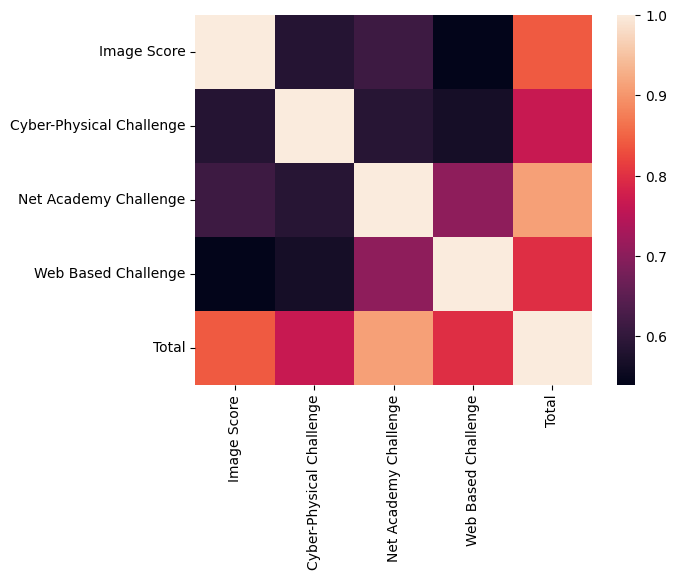

In [14]:
sns.heatmap(numericaldata.corr())

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(numericaldata)
Scaled_data = scaler.transform(numericaldata)

model = PCA(n_components= 2)
model.fit(Scaled_data)

PCS = model.transform(Scaled_data)
PCA_df = pd.DataFrame(PCS,columns = ["PC1","PC2"])
PCA_df["Tier"] = tiers
PCA_df["Tier"] = PCA_df["Tier"].replace("Middle School",0)
PCA_df["Tier"] = PCA_df["Tier"].replace("Silver",1)
PCA_df["Tier"] = PCA_df["Tier"].replace("Gold",2)
PCA_df["Tier"] = PCA_df["Tier"].replace("Platinum",3)
PCA_df.head() 

,PC1,PC2,Tier
0,2.494900,-0.529899,3
1,-0.268308,-0.257334,2
2,-0.111602,0.023528,3
3,-1.181472,-0.152973,0
4,4.016210,0.035092,3


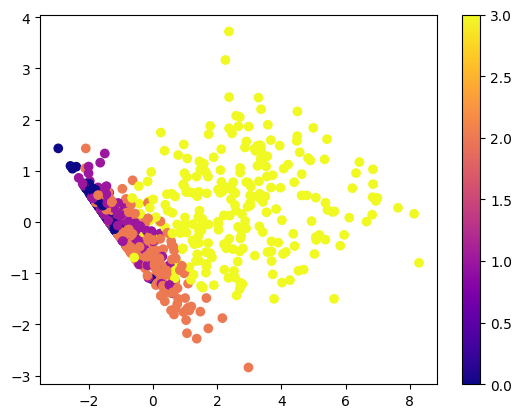

In [16]:
plt.scatter(PCA_df["PC1"],PCA_df["PC2"],c = PCA_df["Tier"],cmap = "plasma")
plt.colorbar()